In [157]:
!pip install pandas scikit-learn matplotlib seaborn tqdm torch


You should consider upgrading via the '/Users/pedrotorrezani/Desktop/venv/bin/python3 -m pip install --upgrade pip' command.


In [158]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import math
import torch.optim as optim

In [159]:
df = pd.read_csv("credit_card_transactions.csv")
df.head(10)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [161]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(1296675, 24)

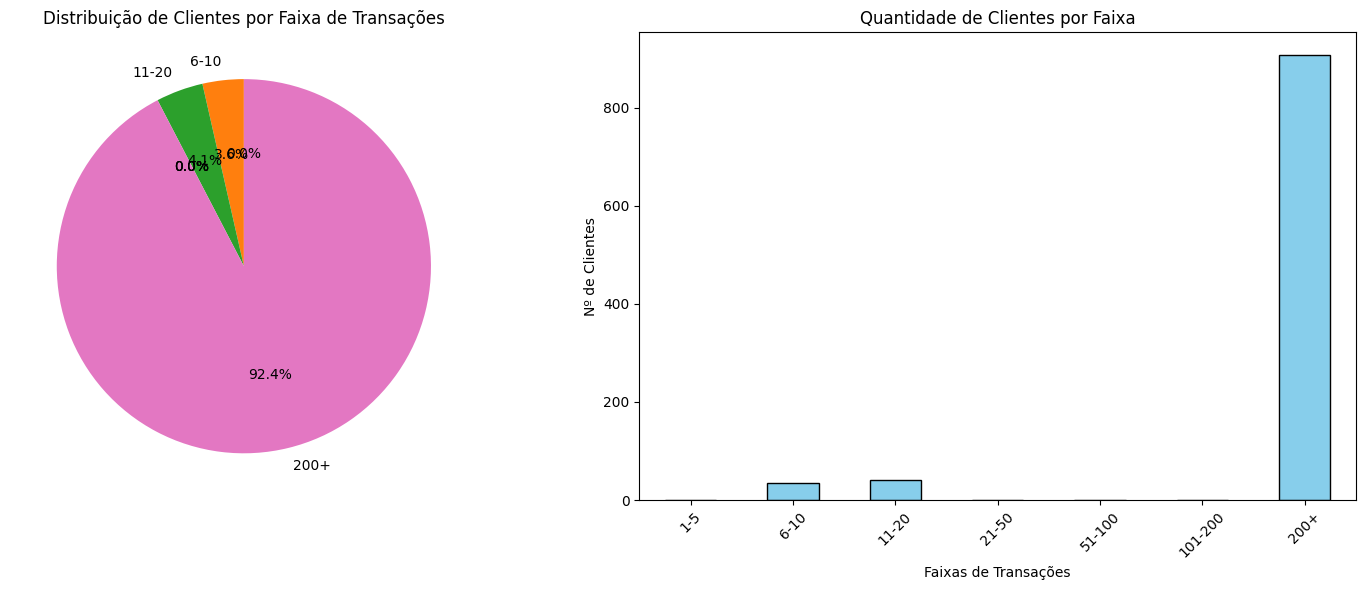

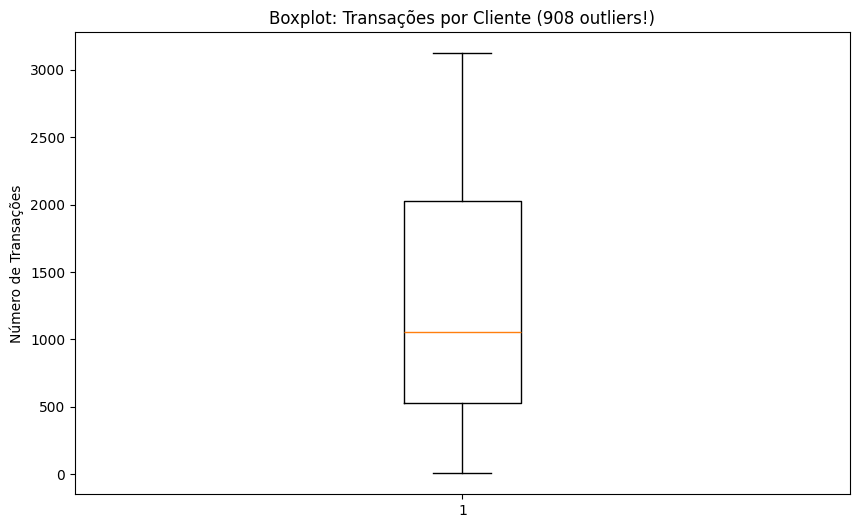

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

transacoes_por_cliente = df['cc_num'].value_counts().sort_index()

faixas = pd.Series([0, 35, 40, 0, 0, 0, 908], 
                   index=['1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '200+'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

faixas.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribuição de Clientes por Faixa de Transações')
ax1.set_ylabel('')

# Tabela visual
faixas.plot(kind='bar', ax=ax2, color='skyblue', edgecolor='black')
ax2.set_title('Quantidade de Clientes por Faixa')
ax2.set_xlabel('Faixas de Transações')
ax2.set_ylabel('Nº de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(transacoes_por_cliente.values, vert=True)
plt.title('Boxplot: Transações por Cliente (908 outliers!)')
plt.ylabel('Número de Transações')
plt.show()

In [ ]:
# Precisamos limpar nossa estrutura de dados para não poluir nosso modelo com informações que podem confudir 
#e fazer com que ele relacione variaveis erradas que não afetam diretamente se é fraude ou não
# Dados que selecionamos importante 
# 1- Dia da semana e horario em que a compra foi feita
# 2- Valor da compra 
# 3- Categoria do estabelicimento em que foi processada a transação


#Obs importante :
# Pensamos em adicionar a variavel de lat e long da compra para ascrentar a informacao geografica para permitir que o modelo relacione
# compras feitas em periodo de tempo pequeno em distancias grandes como fraudes porem pela complexidade e pela abertura de variaveis 
# definimos nao implementar

In [163]:
cols_to_drop = [
    'Unnamed: 0', 
    'trans_num',    
    'street', 'city', 'state', 'zip', 'merch_zipcode', 
    'lat', 'long', 'merch_lat', 'merch_long',          
    'first', 'last', 'dob', 'job',                     
    'unix_time',                                      
    'merchant', 'city_pop','gender'                           
]
df_clean = df.drop(columns=cols_to_drop)

In [164]:
df_clean['trans_date_trans_time'] = pd.to_datetime(df_clean['trans_date_trans_time'])

df_clean['unix_time'] = df_clean['trans_date_trans_time'].astype('int64')

df_clean['hour'] = df_clean['trans_date_trans_time'].dt.hour
df_clean['day_of_week'] = df_clean['trans_date_trans_time'].dt.dayofweek

df_clean = df_clean.sort_values(by=['cc_num', 'unix_time'])

In [165]:
df_clean = df_clean.drop(columns=['trans_date_trans_time'])

In [166]:
df_clean.head(100 )

,cc_num,category,amt,is_fraud,unix_time,hour,day_of_week
1017,60416207185,misc_net,7.27,0,1546346835000000000,12,1
2724,60416207185,gas_transport,52.94,0,1546418697000000000,8,2
2726,60416207185,gas_transport,82.08,0,1546418856000000000,8,2
2882,60416207185,kids_pets,34.79,0,1546432694000000000,12,2
2907,60416207185,home,27.18,0,1546434646000000000,13,2
...,...,...,...,...,...,...,...
89546,60416207185,health_fitness,26.13,0,1550858311000000000,17,4
89572,60416207185,shopping_net,1.24,0,1550859824000000000,18,4
89642,60416207185,misc_pos,11.60,0,1550862989000000000,19,4
89848,60416207185,home,200.83,0,1550873133000000000,22,4


In [ ]:
# O proximo processo importante é transformar category em token para que nosso modelo possa compreender e relacionar com as outras variaveis
# Decidimos criar o nosso tokenizador e usar como um dicionario para o modelo conferir

In [167]:
class CategoryTokenizer:
    def __init__(self, unk_token='<UNK>'):
        self.unk_token = unk_token
        # O ID 0 é reservado para categorias que não forem usadas na base de treino (UNK)
        self.token_map = {unk_token: 0} 
        self.frozen = False 

    def fit(self, series):
        """
        Lê todas as categorias únicas do treino e cria o dicionário.
        """
        if self.frozen:
            print("Aviso: O tokenizador está travado (frozen). Ignorando fit.")
            return

        unique_cats = sorted(series.unique().astype(str))
        
        for i, cat in enumerate(unique_cats, start=1):
            self.token_map[cat] = i
        
        self.frozen = True
        print(f"✅ Tokenizador treinado! Vocabulário: {len(self.token_map)} tokens (incluindo {self.unk_token}).")

    def transform(self, series):
        """
        Converte as categorias em números.
        Se aparecer algo novo (que não estava no fit), vira 0 (<UNK>).
        """
        
        unk_id = self.token_map[self.unk_token]
        return series.astype(str).apply(lambda x: self.token_map.get(x, unk_id))

    def save_vocab(self, filepath):
        """Salva o mapa em JSON."""
        with open(filepath, 'w') as f:
            json.dump(self.token_map, f, indent=4)
        print(f"💾 Vocabulário salvo em: {filepath}")

    def load_vocab(self, filepath):
        """Carrega o mapa do JSON (usar na API/Produção)."""
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"Arquivo {filepath} não encontrado.")
        
        with open(filepath, 'r') as f:
            self.token_map = json.load(f)
        self.frozen = True
        print(f"📂 Vocabulário carregado de {filepath}. Total: {len(self.token_map)} tokens.")

In [168]:
# Instanciamos o tokenizador

cat_tokenizer.fit(df_clean['category'])

df_clean['category_idx'] = cat_tokenizer.transform(df_clean['category'])

# 3. SAVE: Salva o arquivo 'vocab.json' para o futuro
cat_tokenizer.save_vocab('category_vocab.json')

# 4. LIMPEZA FINAL: Remove a coluna de texto original
df_clean = df_clean.drop(columns=['category'])

# --- Verificação ---
print("\n🔍 Amostra dos dados tokenizados:")
print(df_clean.head())

✅ Tokenizador treinado! Vocabulário: 15 tokens (incluindo <UNK>).
💾 Vocabulário salvo em: category_vocab.json

🔍 Amostra dos dados tokenizados:
           cc_num    amt  is_fraud            unix_time  hour  day_of_week  \
1017  60416207185   7.27         0  1546346835000000000    12            1   
2724  60416207185  52.94         0  1546418697000000000     8            2   
2726  60416207185  82.08         0  1546418856000000000     8            2   
2882  60416207185  34.79         0  1546432694000000000    12            2   
2907  60416207185  27.18         0  1546434646000000000    13            2   

      category_idx  
1017             9  
2724             3  
2726             3  
2882             8  
2907             7  

🧪 Teste de Robustez (Simulando uma categoria nova):
Entrada: ['grocery_pos', 'LOJA_INEXISTENTE_DO_FUTURO']
Saída IDs: [5, 0]


In [ ]:
# O proximo passo é criar as sequencias temporais de transacoes para treinar nosso modelo e transformar as trasancoes em um tensor 3D 
# (1.2 MI, 5, 4) transações , quantidade de transacoes por serie, variaveis por transacao

In [169]:

df_clean['unix_time'] = df_clean['unix_time'].astype('float64') / 1e9

# Ordenamos por Cartão e Tempo para calcular a diferença de tempo entre as transações corretamente
df_clean = df_clean.sort_values(by=['cc_num', 'unix_time'])

# Time Delta: Diferença de tempo para a transação anterior do mesmo cartão
# "Quantos segundos se passaram desde a última vez?"
df_clean['time_delta'] = df_clean.groupby('cc_num')['unix_time'].diff().fillna(0)

# Aplicação de Log (Normalização para ajudar a rede neural)
# Adicionamos 1 (np.log1p) para evitar log(0)
df_clean['amt_log'] = np.log1p(df_clean['amt'])
df_clean['time_delta_log'] = np.log1p(df_clean['time_delta'])

# Definindo as colunas finais
features_cols = ['category_idx', 'amt_log', 'hour', 'day_of_week', 'time_delta_log']
target_col = 'is_fraud'

# ==============================================================================
# 2. SPLIT TEMPORAL (Divisão Treino/Validação) Mais antingos = treino , Recentes = validação
# ==============================================================================

# Primeiro, ordenamos TUDO por tempo globalmente para achar o ponto de corte
df_clean = df_clean.sort_values(by='unix_time')

# Definimos o ponto de corte nos 80% mais antigos
cutoff_index = int(len(df_clean) * 0.8)
cutoff_timestamp = df_clean.iloc[cutoff_index]['unix_time']

print(f"Data de Corte (Timestamp): {cutoff_timestamp:.0f}")

# Separamos os DataFrames
df_train = df_clean[df_clean['unix_time'] < cutoff_timestamp].copy()
df_val = df_clean[df_clean['unix_time'] >= cutoff_timestamp].copy()

print(f"Transações de Treino (Passado): {len(df_train)}")
print(f"Transações de Validação (Futuro): {len(df_val)}")

Data de Corte (Timestamp): 1583479003
Transações de Treino (Passado): 1037340
Transações de Validação (Futuro): 259335

3. Gerando Janelas Deslizantes...


In [ ]:
# O proximo passo era criar janelasde transacoes para serem analisados pelo modelo para que ele tenha contexto 

In [179]:
def create_sliding_windows(df, seq_len=5):
    """
    Função otimizada com Numpy para criar janelas agrupadas por cliente.
    """
    
    df = df.sort_values(by=['cc_num', 'unix_time'])
    
    grouped = df.groupby('cc_num')
    all_X = []
    all_y = []
    
    # Extraindo arrays para velocidade
    data_x = df[features_cols].values.astype(np.float32)
    data_y = df[target_col].values.astype(np.float32)
    
    # Dicionário de índices onde cada grupo começa/termina
    indices_list = grouped.indices 
    
    for cc_num, indices in indices_list.items():
        # Se o cliente tem menos transações que o tamanho da janela, pula
        if len(indices) < seq_len:
            continue
            
        # Pega os dados desse cliente usando os índices
        client_x = data_x[indices]
        client_y = data_y[indices]
        
        # Lógica de vetorização (Sliding Window rápida)
        num_windows = len(client_x) - seq_len + 1
        idx_matrix = np.arange(seq_len)[None, :] + np.arange(num_windows)[:, None]
        
        windows_x = client_x[idx_matrix] # (N, 5, 5)
        windows_y = client_y[idx_matrix[:, -1]] # Target da última transação
        
        all_X.append(windows_x)
        all_y.append(windows_y)
    
    if len(all_X) == 0:
        return np.array([]), np.array([])
        
    return np.concatenate(all_X), np.concatenate(all_y)

In [ ]:
# Testamos com janelas de 3 tamanhos e vou deixar abaixo os resultados de cada uma:

In [180]:
# Gerando as janelas separadamente
SEQ_LEN = 20
print("Processando Treino...")
X_train, y_train = create_sliding_windows(df_train, seq_len=SEQ_LEN)

print("Processando Validação...")
X_val, y_val = create_sliding_windows(df_val, seq_len=SEQ_LEN)

print(f"Shape Treino: {X_train.shape}") # (N, 5, 5)
print(f"Shape Validação: {X_val.shape}")

Processando Treino...
Processando Validação...
Shape Treino: (1019521, 20, 5)
Shape Validação: (241909, 20, 5)


In [181]:
class FraudDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Datasets
train_dataset = FraudDataset(X_train, y_train)
val_dataset = FraudDataset(X_val, y_val)

# DataLoaders
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("\n--- Tudo pronto para a Arquitetura do Modelo! ---")
sample_x, sample_y = next(iter(train_loader))
print(f"Exemplo de Batch X: {sample_x.shape}")


--- Tudo pronto para a Arquitetura do Modelo! ---
Exemplo de Batch X: torch.Size([64, 20, 5])


In [183]:
class FraudTransformer(nn.Module):
    def __init__(self, 
                 num_categories, 
                 d_model=64,      
                 nhead=4,        
                 num_layers=2,    
                 dim_feedforward=128, 
                 dropout=0.1,
                 max_len=500      
                 ):
        super(FraudTransformer, self).__init__()
        
        self.d_model = d_model

        # ======================================================================
        # 1. CAMADA DE ENTRADA HÍBRIDA (Feature Fusion)
        # ======================================================================
        
        # A. Embeddings para Categóricas (Onde o modelo aprende o conceito da loja)
        self.category_embedding = nn.Embedding(num_categories + 1, d_model)
        
        # B. Embeddings para Temporais (Hora e Dia)
        self.hour_embedding = nn.Embedding(25, d_model) 
        self.day_embedding = nn.Embedding(8, d_model)

        # C. Projeção para Numéricas (Valor e Tempo Decorrido)
        self.num_projection = nn.Linear(1, d_model) 
        self.delta_projection = nn.Linear(1, d_model)

        
        # Vamos usar SOMA PONDERADA para manter d_model=64
        self.input_proj = nn.Linear(d_model, d_model) # Misturador final

        # ======================================================================
        # 2. POSITIONAL ENCODING (Aprender a Ordem)
        # ======================================================================
        # Usaremos Learnable Positional Embedding (a ordem não interferia muito neste caso e por isso nao optamos por fazer o RoPE como no gpt)
        self.pos_encoder = nn.Parameter(torch.zeros(1, max_len, d_model))

        # ======================================================================
        # 3. O CORAÇÃO (Transformer Encoder)
        # ======================================================================
    
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, 
                                                   nhead=nhead, 
                                                   dim_feedforward=dim_feedforward, 
                                                   dropout=dropout,
                                                   batch_first=True,
                                                   activation="gelu") 
        
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # ======================================================================
        # 4. CABEÇALHO DE CLASSIFICAÇÃO (Classification Head)
        # ======================================================================
        self.classifier = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Linear(d_model // 2, 1)
        )
        
        self.dropout = nn.Dropout(dropout)

In [ ]:

def forward(self, x_cat, x_amt, x_hour, x_day, x_delta):

        # 1. Gerar Representações Vetoriais
        emb_cat = self.category_embedding(x_cat) # [Batch, Seq, 64]
        emb_hour = self.hour_embedding(x_hour)
        emb_day = self.day_embedding(x_day)
        
        # Numéricas precisam de unsqueeze para virar [Batch, Seq, 1] antes da projeção
        emb_amt = self.num_projection(x_amt.unsqueeze(-1))
        emb_delta = self.delta_projection(x_delta.unsqueeze(-1))

        # 2. Fusão das Features (Soma Element-wise)
        x = emb_cat + emb_amt + emb_hour + emb_day + emb_delta
        
        # Escala pela raiz da dimensão 
        x = x * math.sqrt(self.d_model)

        # 3. Adicionar Positional Encoding
        seq_len = x.size(1)
        x = x + self.pos_encoder[:, :seq_len, :]
        x = self.dropout(x)

        # 4. Passar pelo Transformer
        transformer_out = self.transformer_encoder(x)

        # 5. Pooling e Classificação
        # Pegamos apenas a ÚLTIMA transação da sequência (o momento atual)
        # Ela contém o contexto de todo o passado.
        last_step_out = transformer_out[:, -1, :] 

        logits = self.classifier(last_step_out) 

        return logits

In [184]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")


# Hiperparâmetros
VOCAB_SIZE = 15000
LEARNING_RATE = 0.001
EPOCHS = 5 

# Instanciando o Modelo
model = FraudTransformer(
    num_categories=VOCAB_SIZE,
    d_model=64,
    nhead=4,
    num_layers=2,
    dropout=0.1
).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
# Otimizacao usamos Adam, como no GPT
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)


In [185]:
def train_one_epoch(epoch_index):
    model.train() 
    running_loss = 0.0
    all_preds = []
    all_targets = []

    for batch_idx, (data, target) in enumerate(train_loader):
        # Envia para GPU/CPU
        data, target = data.to(device), target.to(device)
        
        # Categóricos precisam ser Long (Inteiro)
        x_cat  = data[:, :, 0].long()
        x_hour = data[:, :, 2].long()
        x_day  = data[:, :, 3].long()
        
        # Numéricos precisam ser Float
        x_amt   = data[:, :, 1].float()
        x_delta = data[:, :, 4].float()
        
        # --- FORWARD PASS ---
        optimizer.zero_grad() # Zera o gradiente anterior para não interferir nos pesos 
        
        outputs = model(x_cat, x_amt, x_hour, x_day, x_delta) # [Batch, 1]
        
        # --- LOSS & BACKWARD --- Aqui onde o modelo aprende de fato
        loss = criterion(outputs, target)
        
        loss.backward() # Calcula gradientes
        
        optimizer.step() # Atualiza pesos
        
        # Métricas
        running_loss += loss.item()
        
        # Guardando para calcular acurácia depois
        # Sigmoid para transformar logit em probabilidade (0 a 1)
        # Por ser um output binario usamos sigmoid
        probs = torch.sigmoid(outputs)
        all_preds.extend(probs.detach().cpu().numpy())
        all_targets.extend(target.detach().cpu().numpy())

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch_index} | Batch {batch_idx} | Loss: {loss.item():.4f}")

    # Média da época
    avg_loss = running_loss / len(train_loader)
    return avg_loss

In [186]:

def validate(epoch_index):
    model.eval() # Modo de avaliação (desliga Dropout)
    running_loss = 0.0
    all_preds = []
    all_targets = []
    
    with torch.no_grad(): # Não calcula gradientes 
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            
            # Repete a Cirurgia
            x_cat  = data[:, :, 0].long()
            x_hour = data[:, :, 2].long()
            x_day  = data[:, :, 3].long()
            x_amt  = data[:, :, 1].float()
            x_delta = data[:, :, 4].float()
            
            outputs = model(x_cat, x_amt, x_hour, x_day, x_delta)
            loss = criterion(outputs, target)
            running_loss += loss.item()
            
            probs = torch.sigmoid(outputs)
            all_preds.extend(probs.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            
    avg_loss = running_loss / len(val_loader)
    
    # Métricas de Fraude (AUC é mais importante que Acurácia em dados desbalanceados)
    try:
        auc = roc_auc_score(all_targets, all_preds)
    except:
        auc = 0.5 
        
    print(f"--- Fim da Epoch {epoch_index} ---")
    print(f"Val Loss: {avg_loss:.4f} | Val AUC: {auc:.4f}")
    return avg_loss

In [187]:

best_val_loss = float('inf')

for epoch in range(EPOCHS):
    print(f"\n--- Epoch {epoch+1}/{EPOCHS} ---")
    
    train_loss = train_one_epoch(epoch+1)
    val_loss = validate(epoch+1)
    
  
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_fraud_transformer.pth')
        print("✅ Melhor modelo salvo!")

print("\nTreinamento concluído!")


--- Epoch 1/5 ---
Epoch 1 | Batch 0 | Loss: 0.5187
Epoch 1 | Batch 100 | Loss: 0.0073
Epoch 1 | Batch 200 | Loss: 0.0071
Epoch 1 | Batch 300 | Loss: 0.0280
Epoch 1 | Batch 400 | Loss: 0.0041
Epoch 1 | Batch 500 | Loss: 0.0909
Epoch 1 | Batch 600 | Loss: 0.1629
Epoch 1 | Batch 700 | Loss: 0.0077
Epoch 1 | Batch 800 | Loss: 0.0411
Epoch 1 | Batch 900 | Loss: 0.0982
Epoch 1 | Batch 1000 | Loss: 0.0076
Epoch 1 | Batch 1100 | Loss: 0.0933
Epoch 1 | Batch 1200 | Loss: 0.0023
Epoch 1 | Batch 1300 | Loss: 0.0038
Epoch 1 | Batch 1400 | Loss: 0.0027
Epoch 1 | Batch 1500 | Loss: 0.0022
Epoch 1 | Batch 1600 | Loss: 0.0025
Epoch 1 | Batch 1700 | Loss: 0.0767
Epoch 1 | Batch 1800 | Loss: 0.0060
Epoch 1 | Batch 1900 | Loss: 0.0126
Epoch 1 | Batch 2000 | Loss: 0.0067
Epoch 1 | Batch 2100 | Loss: 0.0009
Epoch 1 | Batch 2200 | Loss: 0.0094
Epoch 1 | Batch 2300 | Loss: 0.0013
Epoch 1 | Batch 2400 | Loss: 0.0081
Epoch 1 | Batch 2500 | Loss: 0.0041
Epoch 1 | Batch 2600 | Loss: 0.0075
Epoch 1 | Batch 2700 

Analisando Validação...
--- Relatório de Classificação ---
              precision    recall  f1-score   support

    Legítimo       1.00      1.00      1.00    240671
      Fraude       0.97      0.86      0.91      1238

    accuracy                           1.00    241909
   macro avg       0.98      0.93      0.96    241909
weighted avg       1.00      1.00      1.00    241909



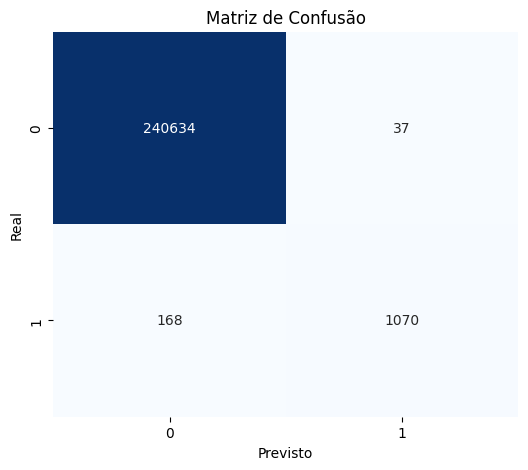

In [188]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def diagnostico_completo(loader):
    model.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            
            # Desempacota
            x_cat = data[:, :, 0].long()
            x_amt = data[:, :, 1].float()
            x_hour = data[:, :, 2].long()
            x_day = data[:, :, 3].long()
            x_delta = data[:, :, 4].float()
            
            outputs = model(x_cat, x_amt, x_hour, x_day, x_delta)
            
            # Transforma logit em 0 ou 1 (Threshold 0.5)
            preds = torch.sigmoid(outputs) > 0.5
            
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Matriz
    cm = confusion_matrix(all_targets, all_preds)
    
    print("--- Relatório de Classificação ---")
    print(classification_report(all_targets, all_preds, target_names=['Legítimo', 'Fraude']))
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

print("Analisando Validação...")
diagnostico_completo(val_loader)